# Full Analysis Basic Example
## PrepGsea Package


----------------------

Author: Mikayla Webster (13webstermj@ucsd.edu)

Date: 14th May, 2018

----------------------

<a id='toc'></a>
## Table of Contents
1. [Background](#background)
1. [Tips](#tip)
2. [Import packages](#import)
3. [User Preferences for Metafile Filtering](#meta)
6. [Filter Expression File](#expression)
8. [GSEA call](#gsea)
8. [Visualization Functions](#vis)

## Background
<a id='background'></a>

The gene set enrichment analysis workflow provides an interactive interface to the gseapy tools.

This notebook shows you how to use the complete functionality of our PrepGsea module from start to finish. We have provided a simple gmt and meta file compatible with this notebook. With these two alone (and a dummy expression file), you can run the preferences selection portion of this notebook. In order to run the full analysis, you will need to provide an expression file. 

## Tips ##
<a id='tip'></a>

- For each cell: Run the cell, fill out the widget/form, (don't run that cell again), then run the next cell.

- If your analysis isn't looking right, try re-running it from the beginning. If information is given out of order, PrepGsea will sometimes forget important information.

## Import Packages
<a id='import'></a>

In [1]:
# uncomment if you have not pip-installed network_bio_toolkit

#import sys
#code_path = '../../network_bio_toolkit'
#sys.path.append(code_path)
#import PrepGsea
#reload(PrepGsea)

from network_bio_toolkit import PrepGsea
reload(PrepGsea)

<module 'network_bio_toolkit.PrepGsea' from 'C:\Users\m1web\Anaconda2\lib\site-packages\network_bio_toolkit\PrepGsea.pyc'>

## User Preferences for Metafile Filtering
<a id='meta'></a>

In [2]:
gsea_prepper = PrepGsea.PrepGsea(gmt_file = '../../gseapy_databases/h.all.v6.1.symbols.gmt', # provided
                        expression_file = '../../gseapy_databases/RNA_cpm_all_samples.tsv', # need to supply your own expression file
                        meta_file = '../../gseapy_databases/dHEP_metadata.csv', # provided
                        output_dir = '../../gsea_output') # There can sometimes be errors if you use an existing folder path for gsea_output

In [3]:
# check box Sample_Name2 to remove that column from the analysis

gsea_prepper.remove_extra_columns()

Indicate any columns that contain information you do not want to analyze.


Box(children=(Box(children=(Label(value=u'Remove unnecesary columns:'), VBox(children=(VBox(children=(Checkbox(value=False, description=u'Sample_name', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'Sample_Name2', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'mouse genotype', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'short_genotype', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'Model', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'Treatment', style=DescriptionStyle(description_width=u'initial')), Checkbox(value=False, description=u'Tissue', style=DescriptionStyle(description_width=u'initial'))), layout=Layout(overflow=u'scroll')),))), layout=Layout(display=u'flex', flex_flow=u'row', justify_content=u'space-between')),), layout=Layout(align_items=u'stretch', border=u'solid 2px', display=u'flex', flex_flow=u'column', width=u'50%'))

In [4]:
# Pick 'Tissue' from drop down choices

gsea_prepper.choose_comparison_col('Sample_name') # indicate sample name column (it shouldn't be a comparison choice)

Please choose a class from the following list.

Do not reload cell after marking your choice.
Mark your choice before proceding.


Box(children=(Box(children=(Label(value=u'Comparison options'), Dropdown(options=('mouse genotype', 'short_genotype', 'Model', 'Treatment', 'Tissue'), value='mouse genotype')), layout=Layout(display=u'flex', flex_flow=u'row', justify_content=u'space-between')),), layout=Layout(align_items=u'stretch', border=u'solid 2px', display=u'flex', flex_flow=u'column', width=u'50%'))

In [5]:
# Please choose the following:

# Tissue class A: Liver
# Tissue class B: liver_tumor

gsea_prepper.choose_two_classes() # text must match exactly what's in your meta dataframe

Please specify the two classes you wish to compare for class "Tissue".

Do not reload cell after indicating your choices.
Indicate your choices before proceding.
Reload this cell if the correct class isn't showing


Box(children=(Box(children=(Label(value=u'Tissue class A'), Dropdown(options=('Liver', 'liver_tumor'), value='Liver')), layout=Layout(display=u'flex', flex_flow=u'row', justify_content=u'space-between')), Box(children=(Label(value=u'Tissue class B'), Dropdown(options=('Liver', 'liver_tumor'), value='Liver')), layout=Layout(display=u'flex', flex_flow=u'row', justify_content=u'space-between'))), layout=Layout(align_items=u'stretch', border=u'solid 2px', display=u'flex', flex_flow=u'column', width=u'50%'))

In [6]:
# Please choose the following:

# mouse genotype: Alb-Cre;IL-17RA-flox/flox (defualt choice)
# short_genotype: AlbCre_IL17RA_floxflox
# Model: DEN (default choice)
# Treatment: DEN_HFD_alcohol (default choice)

gsea_prepper.choose_controls() # text must match exactly what's in your meta dataframe

Please specify your control values for each of the following.

Do not reload cell after typing your choices.
Type your choices before proceding.


Box(children=(Box(children=(Label(value=u'mouse genotype'), Dropdown(options=('Alb-Cre;IL-17RA-flox/flox', 'IL-17RA-flox/flox'), value='Alb-Cre;IL-17RA-flox/flox')), layout=Layout(display=u'flex', flex_flow=u'row', justify_content=u'space-between')), Box(children=(Label(value=u'short_genotype'), Dropdown(options=('IL17RA_floxflox', 'AlbCre_IL17RA_floxflox'), value='IL17RA_floxflox')), layout=Layout(display=u'flex', flex_flow=u'row', justify_content=u'space-between')), Box(children=(Label(value=u'Model'), Dropdown(options=('DEN ', 'no_injury'), value='DEN ')), layout=Layout(display=u'flex', flex_flow=u'row', justify_content=u'space-between')), Box(children=(Label(value=u'Treatment'), Dropdown(options=('DEN_HFD_alcohol', 'no_injury', 'DEN_only'), value='DEN_HFD_alcohol')), layout=Layout(display=u'flex', flex_flow=u'row', justify_content=u'space-between'))), layout=Layout(align_items=u'stretch', border=u'solid 2px', display=u'flex', flex_flow=u'column', width=u'50%'))

In [7]:
gsea_prepper.filter_metafile()

Filtering metafile by the following classes and controls:

class name: Tissue
Tissue value 1: Liver
Tissue value 2: liver_tumor

controls: 
mouse genotype: Alb-Cre;IL-17RA-flox/flox
short_genotype: AlbCre_IL17RA_floxflox
Model: DEN 
Treatment: DEN_HFD_alcohol

Please confirm that all the information above is correct.



,Sample_name,mouse genotype,short_genotype,Model,Treatment,Tissue
0,dHEP_518_A_NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
1,dHEP_520_A_NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
2,dHEP_549_A_NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
3,dHEP_550_A_NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
4,dHEP_518_A_T1,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
5,dHEP_520_A_T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
6,dHEP_549_A_T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
7,dHEP_550_A_T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor


## Filter Expression File
<a id='expression'></a>

In [8]:
# None of the output tables should be empty. If so, try re-running the pipeline
gsea_prepper.filter_expression_file()

Expression file before filtering: (22187, 30)


,dHEP_549_A_T,dHEP_520_A_NT,dHEP_178_NI,F_F_167_NC_T,dHEP_550_A_NT,F_F_158_NC_NT,dHEP_549_A_NT,dHEP_520_A_T,F_F_169_NC_T,F_F_503_A_T1,...,dHEP_164_NC_NT,F_F_523_A_T1,F_F_184_NI,dHEP_155_NC_NT,F_F_159_NC_NT,dHEP_165_NC_T,dHEP_155_NC_T,F_F_168_NC_T,F_F_595_A_T,F_F_581_A_NT
Gnai3,121.519560,89.035979,94.557437,113.223446,98.230254,111.136707,97.474351,132.836892,109.328840,114.096305,...,113.769663,132.891660,109.728700,106.096154,103.304758,192.471416,153.176144,183.460817,152.620839,108.366033
NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Cdc45,1.958903,1.673062,1.196930,2.630385,1.766455,1.086912,0.898758,2.300206,1.993288,1.984284,...,2.222064,1.612585,0.693510,1.687041,1.777031,1.688346,4.976438,4.123100,1.531535,1.943865
NaN,0.067548,0.072742,0.108812,0.233812,0.153605,0.000000,0.000000,0.287526,0.241611,0.631363,...,0.000000,0.293197,0.077057,0.000000,0.000000,0.135068,0.238221,0.056104,0.000000,0.065916
Apoh,1484.443494,1381.221548,1823.576617,1170.813440,1223.001220,1827.370055,1292.413480,886.585618,1267.127294,1078.638506,...,1497.374679,1145.375110,1898.753434,1567.636285,1727.570680,1453.395562,627.533836,1003.480178,1232.619699,1349.697628



Filtered meta file: (8, 6)


,Sample_name,mouse genotype,short_genotype,Model,Treatment,Tissue
0,dHEP_518_A_NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
1,dHEP_520_A_NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
2,dHEP_549_A_NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
3,dHEP_550_A_NT,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,Liver
4,dHEP_518_A_T1,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
5,dHEP_520_A_T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
6,dHEP_549_A_T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor
7,dHEP_550_A_T,Alb-Cre;IL-17RA-flox/flox,AlbCre_IL17RA_floxflox,DEN,DEN_HFD_alcohol,liver_tumor



Filtered expression file: (22187, 9)


,Name,dHEP_518_A_NT,dHEP_520_A_NT,dHEP_549_A_NT,dHEP_550_A_NT,dHEP_518_A_T1,dHEP_520_A_T,dHEP_549_A_T,dHEP_550_A_T
0,GNAI3,89.013791,89.035979,97.474351,98.230254,109.496950,132.836892,121.519560,230.577450
1,NAN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,CDC45,2.455007,1.673062,0.898758,1.766455,1.489754,2.300206,1.958903,6.451114
3,NAN,0.000000,0.072742,0.000000,0.153605,0.165528,0.287526,0.067548,0.199519
4,APOH,1312.319871,1381.221548,1292.413480,1223.001220,1304.197234,886.585618,1484.443494,1383.930242


## GSEA Call
<a id='gsea'></a>

In [9]:
gsea_prepper.call_gsea(method = 'log2_ratio_of_classes',
          processes = 4,
          format = 'png',
          permutation_num = 10,
          weighted_score_type = 1)

2018-06-27 11:14:50,484 Warning: dropping duplicated gene names, only keep the first values


This may take a few minutes.



C:\Users\m1web\Anaconda2\lib\site-packages\gseapy\algorithm.py:525: RuntimeWarning: divide by zero encountered in true_divide
  np.sum(esnull >= es.reshape(len(es),1), axis=1)/ np.sum(esnull >= 0, axis=1)]
C:\Users\m1web\Anaconda2\lib\site-packages\gseapy\algorithm.py:525: RuntimeWarning: invalid value encountered in true_divide
  np.sum(esnull >= es.reshape(len(es),1), axis=1)/ np.sum(esnull >= 0, axis=1)]
C:\Users\m1web\Anaconda2\lib\site-packages\gseapy\algorithm.py:573: RuntimeWarning: Mean of empty slice.
  meanPos = enrNull[enrNull >= 0].mean()
C:\Users\m1web\Anaconda2\lib\site-packages\numpy\core\_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Gsea output written to filepath:
../../gsea_output/gseapy.gsea.gene_set.report.csv

Class and comparison preferences written to filepath:
../../gsea_output/extra_gsea_info.txt


,es,nes,pval,fdr,geneset_size,matched_size,genes
Term,,,,,,,
HALLMARK_TNFA_SIGNALING_VIA_NFKB,-0.585090,-1.728652,0.0,0.0,200,180,"G0S2,LAMB3,PFKFB3,NFIL3,GEM,KLF2,SPSB1,SPHK1,G..."
HALLMARK_SPERMATOGENESIS,-0.607631,-1.968327,0.0,0.0,135,73,"ELOVL3,TULP2,SLC12A2,PCSK4,SLC2A5,HSPA2,ARL4A,..."
HALLMARK_PANCREAS_BETA_CELLS,0.364282,1.769763,0.0,0.0,40,20,"G6PC2,MAFB,DPP4,GCK,HNF1A,SLC2A2,PKLR,PAX6,FOX..."
HALLMARK_ANGIOGENESIS,-0.723299,-1.718555,0.0,0.0,36,32,"NRP1,FGFR1,VTN,APOH,VEGFA,THBD,SLCO2A1,LUM,LRP..."
HALLMARK_P53_PATHWAY,-0.504671,-1.521033,0.0,0.0,200,180,"TCHH,RETSAT,PMM1,ABAT,STEAP3,TPRKB,CEBPA,DCXR,..."


## Visualization Functions
<a id='vis'></a>

Filtering metafile by the following classes and controls:

class name: Tissue
Tissue value 1: Liver
Tissue value 2: liver_tumor

controls: 
mouse genotype: Alb-Cre;IL-17RA-flox/flox
short_genotype: AlbCre_IL17RA_floxflox
Model: DEN 
Treatment: DEN_HFD_alcohol

Please confirm that all the information above is correct.



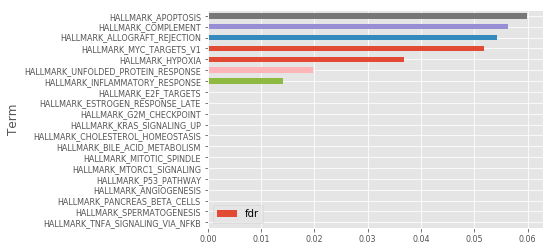

In [31]:
import matplotlib.pyplot as plt
gsea_prepper.plot_gsea(style_content = 'ggplot', top = 20, y = 'fdr', x = 'Term', fontsize = 8)
plt.savefig('gsea_output_1', dpi = 300, bbox_inches = "tight")

Filtering metafile by the following classes and controls:

class name: Tissue
Tissue value 1: Liver
Tissue value 2: liver_tumor

controls: 
mouse genotype: Alb-Cre;IL-17RA-flox/flox
short_genotype: AlbCre_IL17RA_floxflox
Model: DEN 
Treatment: DEN_HFD_alcohol

Please confirm that all the information above is correct.



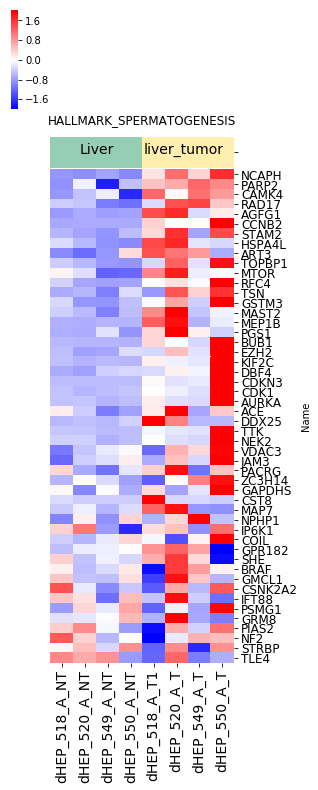

In [32]:
gsea_prepper.plot_individual_pathway_heatmap('HALLMARK_SPERMATOGENESIS')
plt.savefig('gsea_output_2', dpi = 300, bbox_inches = "tight")

In [17]:
# Pick 'Tissue' from drop down choices

gsea_prepper.choose_comparison_col('Sample_name') # indicate sample name column (it shouldn't be a comparison choice)

Please choose a class from the following list.

Do not reload cell after marking your choice.
Mark your choice before proceding.


Box(children=(Box(children=(Label(value=u'Comparison options'), Dropdown(options=('mouse genotype', 'short_genotype', 'Model', 'Treatment', 'Tissue'), value='mouse genotype')), layout=Layout(display=u'flex', flex_flow=u'row', justify_content=u'space-between')),), layout=Layout(align_items=u'stretch', border=u'solid 2px', display=u'flex', flex_flow=u'column', width=u'50%'))